In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data
oil_prices_and_wti_path = '../data/oil-prices-master/data/'
population_path = '../data/population-master/data/'
ppp_path = '../data/ppp-master/data/'

oil_prices_df = pd.read_csv(oil_prices_and_wti_path + 'brent-year.csv')
wti_year_df = pd.read_csv(oil_prices_and_wti_path + 'wti-year.csv')
population_df = pd.read_csv(population_path + 'population.csv')
ppp_df = pd.read_csv(ppp_path + 'ppp-gdp.csv')

In [3]:
# Select countries according to the variant (Belarus, Honduras, Curacao)
population_df = population_df[population_df['Country Name'].isin(['Belarus', 'Honduras', 'Curacao'])]
ppp_df = ppp_df[ppp_df['Country'].isin(['Belarus', 'Honduras', 'Curacao'])]

# Population for 1960 - 2018

In [4]:
# divide the dataset into countries
population_of_belarus = population_df[population_df['Country Name'] == 'Belarus']
population_of_honduras = population_df[population_df['Country Name'] == 'Honduras']
population_of_curacao = population_df[population_df['Country Name'] == 'Curacao']

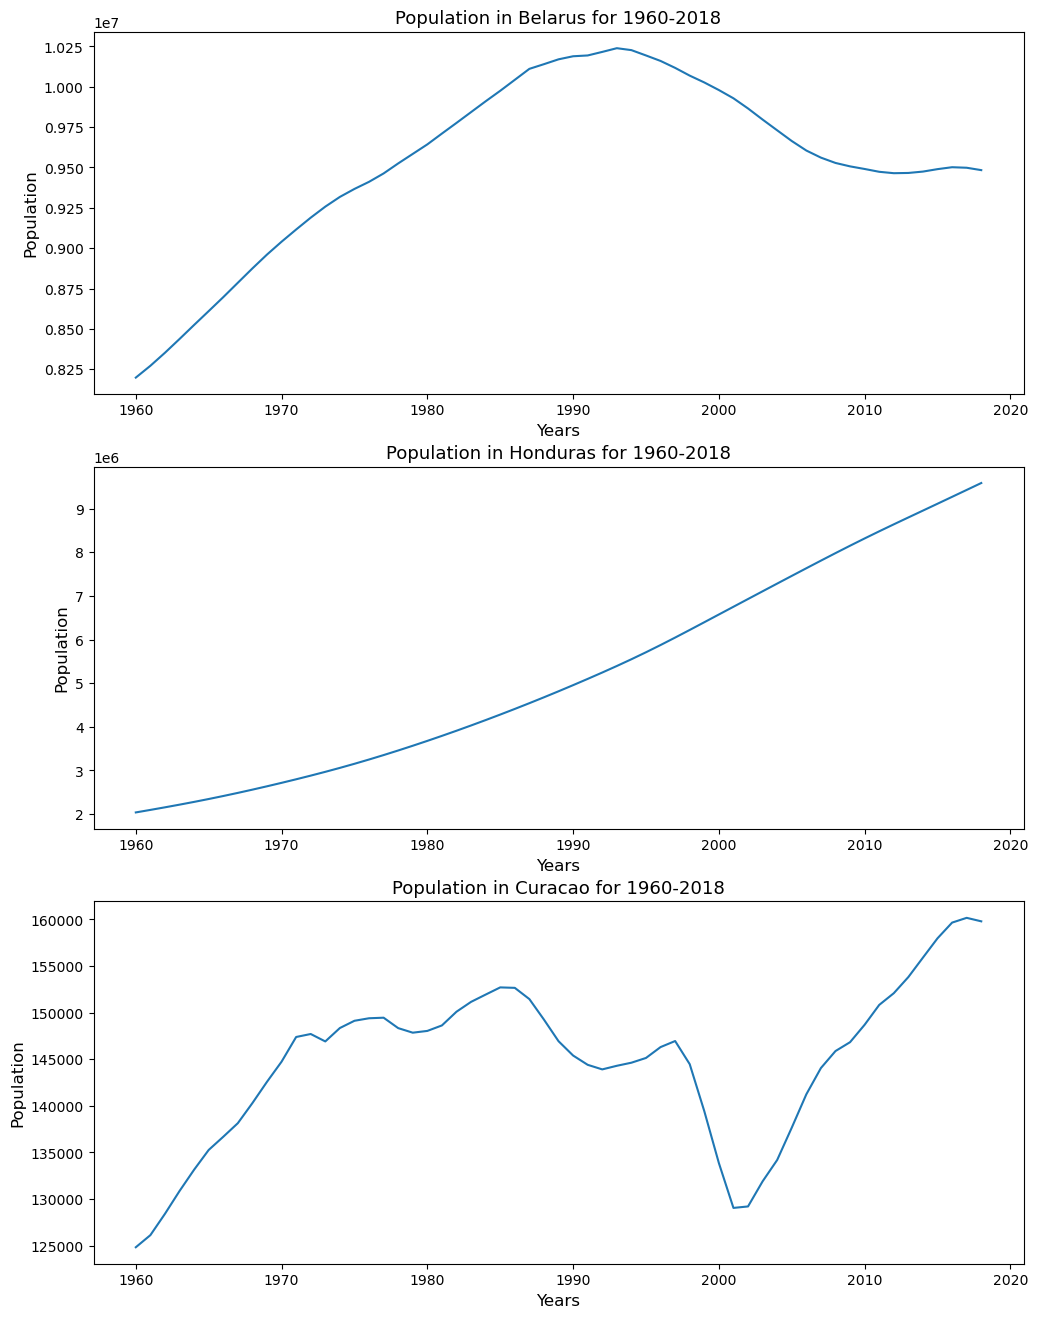

In [5]:
fig1, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,16))

ax1.plot(population_of_belarus['Year'], population_of_belarus['Value'])
ax1.set_title('Population in Belarus for 1960-2018', fontsize = 13)
ax1.set_xlabel('Years', fontsize = 12)
ax1.set_ylabel('Population', fontsize = 12)

ax2.plot(population_of_honduras['Year'], population_of_honduras['Value'])
ax2.set_title('Population in Honduras for 1960-2018', fontsize = 13)
ax2.set_xlabel('Years', fontsize = 12)
ax2.set_ylabel('Population', fontsize = 12)

ax3.plot(population_of_curacao['Year'], population_of_curacao['Value'])
ax3.set_title('Population in Curacao for 1960-2018', fontsize = 13)
ax3.set_xlabel('Years', fontsize = 12)
ax3.set_ylabel('Population', fontsize = 12)

plt.show()
fig1.savefig('../img/population_line.png')

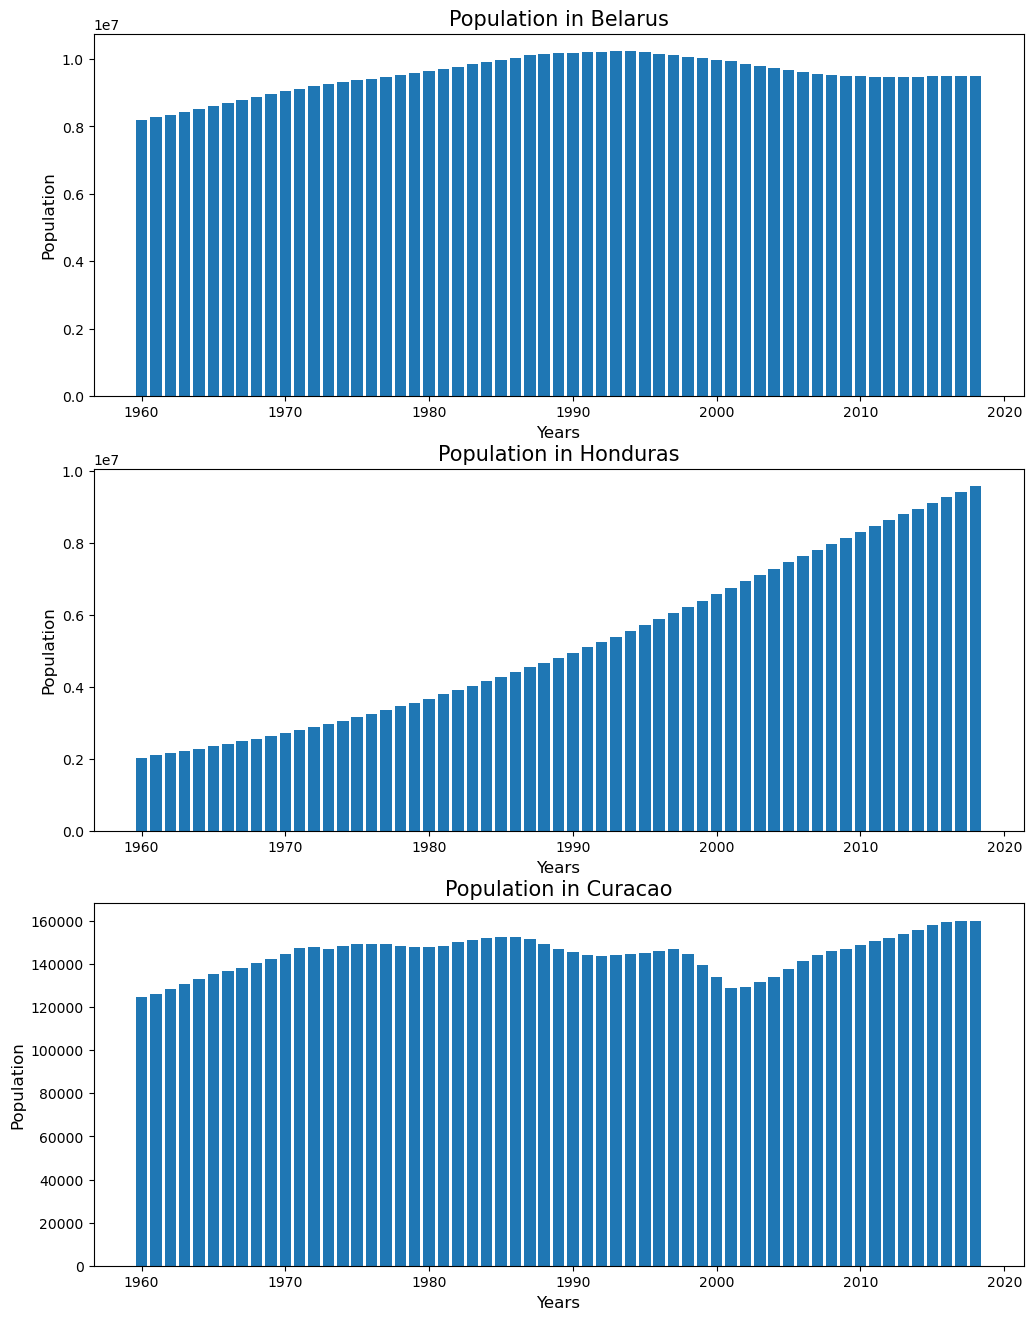

In [6]:
fig2, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,16))
ax1.bar(population_of_belarus['Year'], population_of_belarus['Value'])
ax1.set_title('Population in Belarus', fontsize = 15)
ax1.set_xlabel('Years', fontsize = 12)
ax1.set_ylabel('Population', fontsize = 12)

ax2.bar(population_of_honduras['Year'], population_of_honduras['Value'])
ax2.set_title('Population in Honduras', fontsize = 15)
ax2.set_xlabel('Years', fontsize = 12)
ax2.set_ylabel('Population', fontsize = 12)

ax3.bar(population_of_curacao['Year'], population_of_curacao['Value'])
ax3.set_title('Population in Curacao', fontsize = 15)
ax3.set_xlabel('Years', fontsize = 12)
ax3.set_ylabel('Population', fontsize = 12)

plt.show()
fig2.savefig('../img/population_bar.png')

In [7]:
belarus_pie = population_of_belarus[population_of_belarus['Year'].isin([int(i) for i in range(2008, 2019)])]
honduras_pie = population_of_honduras[population_of_honduras['Year'].isin([int(i) for i in range(2008, 2019)])]
curacao_pie = population_of_curacao[population_of_curacao['Year'].isin([int(i) for i in range(2008, 2019)])]
pie_labels = [str(i) for i in [int(i) for i in range(2008, 2019)]]

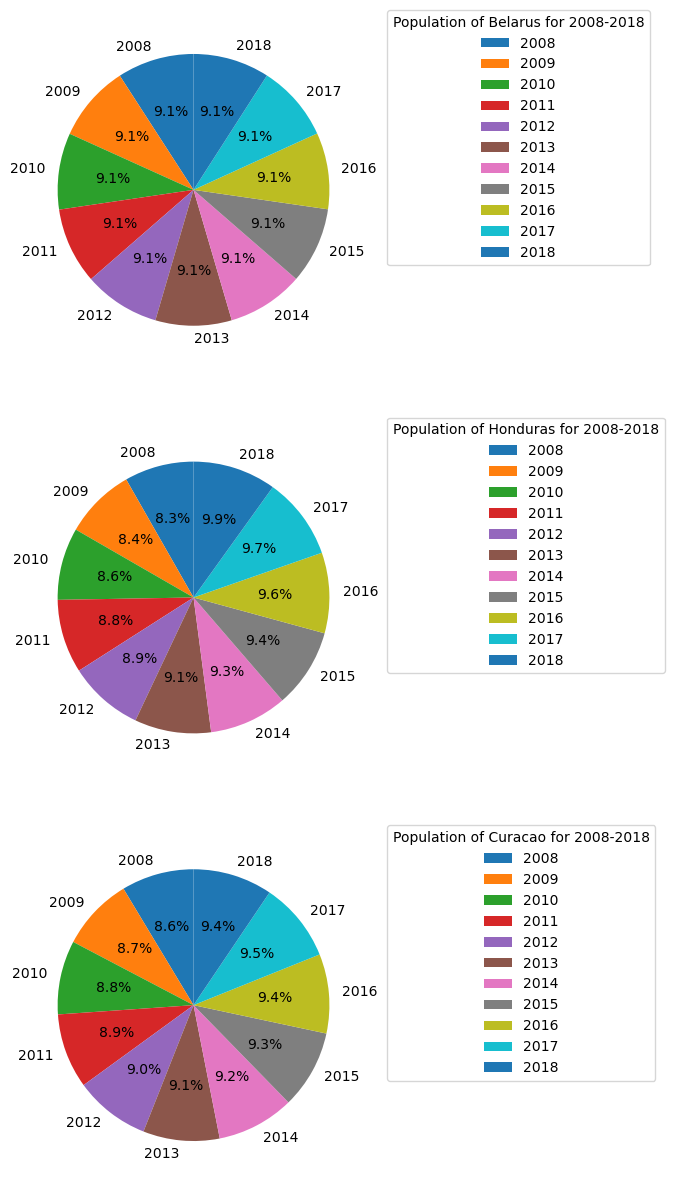

In [8]:
fig3, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(25,15))

ax1.pie(belarus_pie['Value'], labels=pie_labels, startangle = 90, autopct='%1.1f%%', labeldistance=1.1)
ax1.legend(title = "Population of Belarus for 2008-2018", bbox_to_anchor=(1.05, 1.05))

ax2.pie(honduras_pie['Value'], labels=pie_labels, startangle = 90, autopct='%1.1f%%', labeldistance=1.1)
ax2.legend(title = "Population of Honduras for 2008-2018", bbox_to_anchor=(1.05, 1.05))

ax3.pie(curacao_pie['Value'], labels=pie_labels, startangle = 90, autopct=f'%1.1f%%', labeldistance=1.1)
ax3.legend(title = "Population of Curacao for 2008-2018", bbox_to_anchor=(1.05, 1.05))

plt.show()
fig3.savefig('../img/population_pie.png')

# The main statistical values of the population

In [9]:
desc = population_of_belarus['Value'].describe(percentiles=[.25, .75, .95])

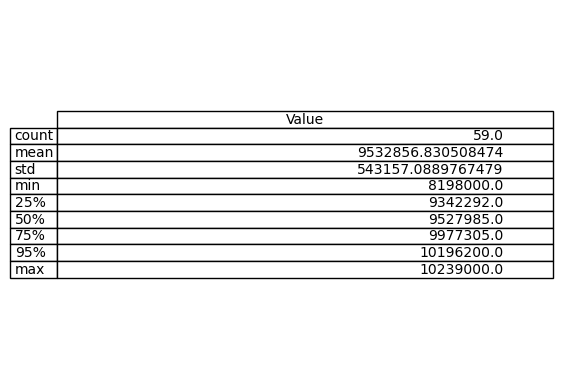

In [10]:
belarus_desc_plot = plt.subplot(111, frame_on=False)
belarus_desc_plot.xaxis.set_visible(False) 
belarus_desc_plot.yaxis.set_visible(False) 
table(belarus_desc_plot, desc, loc='center right')
plt.savefig('../img/main_stat_values_belarus.png')

In [11]:
desc = population_of_honduras['Value'].describe(percentiles=[.25, .75, .95])

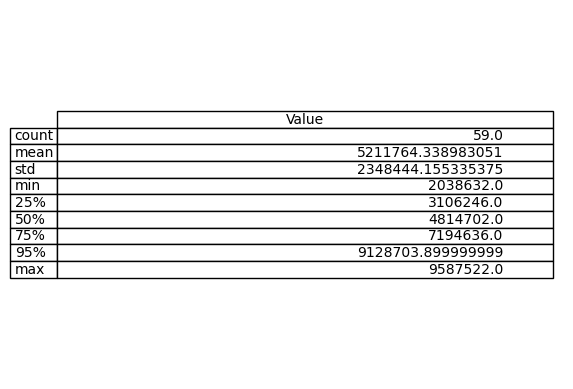

In [12]:
honduras_desc_plot = plt.subplot(111, frame_on=False)
honduras_desc_plot.xaxis.set_visible(False) 
honduras_desc_plot.yaxis.set_visible(False) 
table(honduras_desc_plot, desc, loc='center right')
plt.savefig('../img/main_stat_values_honduras.png')

In [13]:
desc = population_of_curacao['Value'].describe(percentiles=[.25, .75, .95])

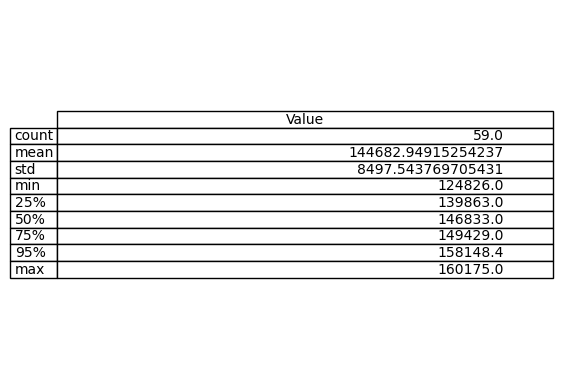

In [14]:
curacao_desc_plot = population_of_curacao['Value'].describe(percentiles=[.25, .75, .95])
curacao_desc_plot = plt.subplot(111, frame_on=False)
curacao_desc_plot.xaxis.set_visible(False) 
curacao_desc_plot.yaxis.set_visible(False) 
table(curacao_desc_plot, desc, loc='center right')
plt.savefig('../img/main_stat_values_curacao.png')

# The relationship between oil prices and purchasing power parity

Since there is not enough data in the datasets, let's merge the tables.

In [15]:
ppp_of_belarus = ppp_df[ppp_df['Country'] == 'Belarus']
ppp_of_honduras = ppp_df[ppp_df['Country'] == 'Honduras']
ppp_of_curacao = ppp_df[ppp_df['Country'] == 'Curacao']
oil_prices_df = oil_prices_df.rename(columns={"Date": "Year"})
oil_and_ppp_of_belarus = ppp_of_belarus.merge(oil_prices_df, how='inner', on='Year')
oil_and_ppp_of_honduras = ppp_of_honduras.merge(oil_prices_df, how='inner', on='Year')
oil_and_ppp_of_curacao = ppp_of_curacao.merge(oil_prices_df, how='inner', on='Year')

### Belarus

In [16]:
oil_and_ppp_of_belarus.corr()

,Year,PPP,Price
Year,1.000000,0.884079,0.698162
PPP,0.884079,1.000000,0.453824
Price,0.698162,0.453824,1.000000


Relationship between oil price and ppp of Belarus is average.

### Honduras

In [17]:
oil_and_ppp_of_honduras.corr()

,Year,PPP,Price
Year,1.000000,0.974506,0.698162
PPP,0.974506,1.000000,0.759035
Price,0.698162,0.759035,1.000000


Relationship between oil price and ppp of Honduras is high.

### Curacao

In [18]:
oil_and_ppp_of_curacao.corr()

,Year,PPP,Price
Year,1.000000,0.814232,0.379971
PPP,0.814232,1.000000,0.463835
Price,0.379971,0.463835,1.000000


Relationship between oil price and ppp of Curacao is average.

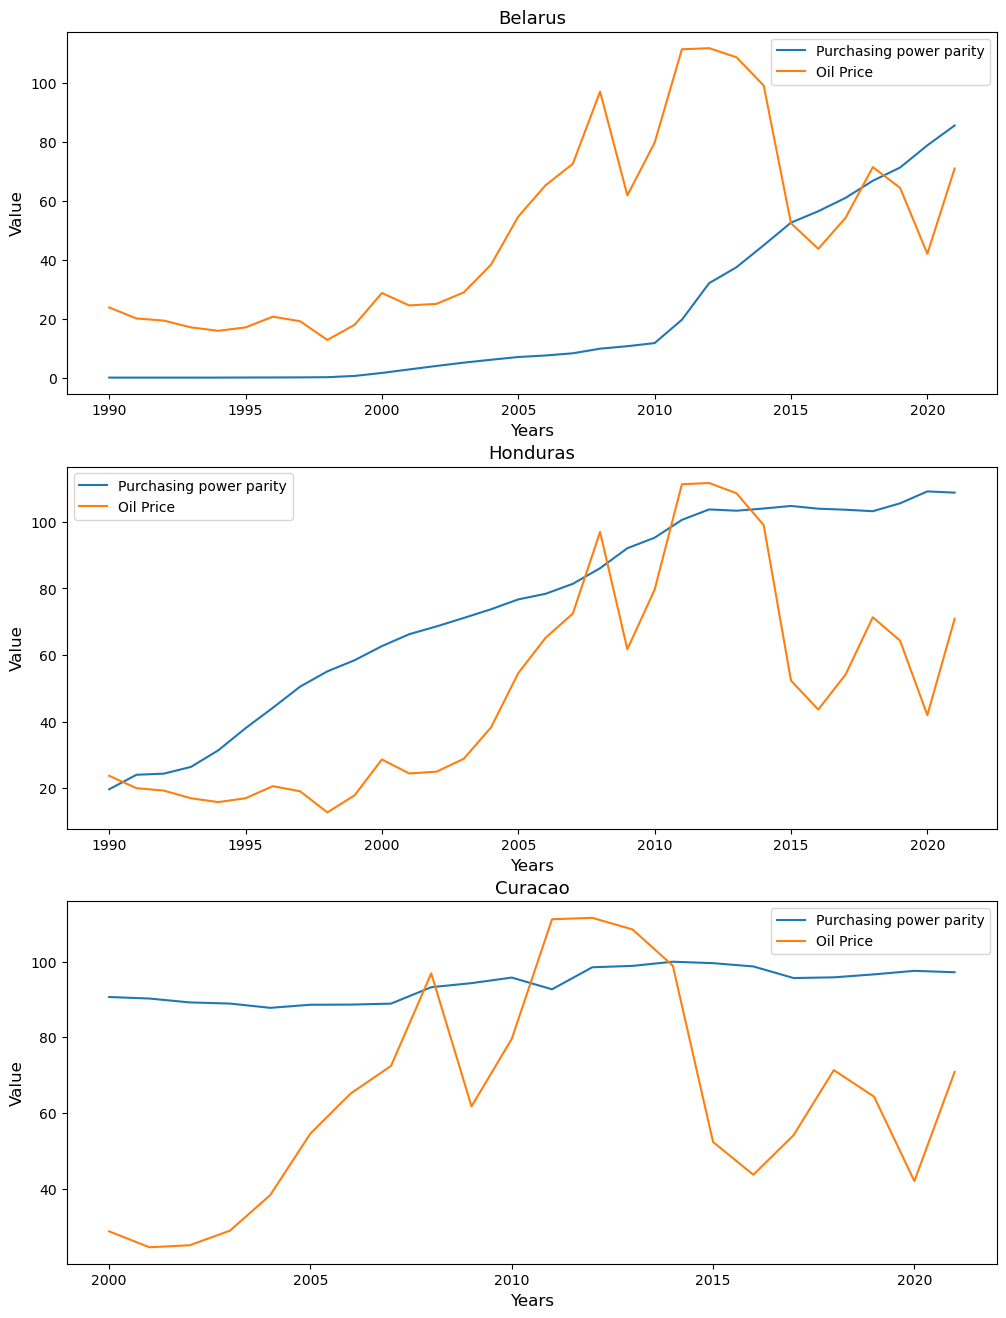

In [19]:
fig11, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,16))

ax1.plot(oil_and_ppp_of_belarus['Year'], oil_and_ppp_of_belarus['PPP']*100, label='Purchasing power parity')
ax1.plot(oil_and_ppp_of_belarus['Year'], oil_and_ppp_of_belarus['Price'], label='Oil Price')
ax1.set_title('Belarus', fontsize = 13)
ax1.set_xlabel('Years', fontsize = 12)
ax1.set_ylabel('Value', fontsize = 12)
ax1.legend()

ax2.plot(oil_and_ppp_of_honduras['Year'], oil_and_ppp_of_honduras['PPP']*10, label='Purchasing power parity')
ax2.plot(oil_and_ppp_of_honduras['Year'], oil_and_ppp_of_honduras['Price'], label='Oil Price')
ax2.set_title('Honduras', fontsize = 13)
ax2.set_xlabel('Years', fontsize = 12)
ax2.set_ylabel('Value', fontsize = 12)
ax2.legend()

ax3.plot(oil_and_ppp_of_curacao['Year'], oil_and_ppp_of_curacao['PPP']*70, label='Purchasing power parity')
ax3.plot(oil_and_ppp_of_curacao['Year'], oil_and_ppp_of_curacao['Price'], label='Oil Price')
ax3.set_title('Curacao', fontsize = 13)
ax3.set_xlabel('Years', fontsize = 12)
ax3.set_ylabel('Value', fontsize = 12)
ax3.legend()

plt.show()
fig11.savefig('../img/ppp_oil_price.png')

# The relationship between population and purchasing power parity

In [20]:
population_and_ppp_of_belarus = population_of_belarus.merge(ppp_of_belarus, how='inner', on='Year')
population_and_ppp_of_honduras = population_of_honduras.merge(ppp_of_honduras, how='inner', on='Year')
population_and_ppp_of_curacao = population_of_curacao.merge(ppp_of_curacao, how='inner', on='Year')

### Belarus

In [21]:
population_and_ppp_of_belarus.corr()

,Year,Value,PPP
Year,1.000000,-0.956080,0.854523
Value,-0.956080,1.000000,-0.710004
PPP,0.854523,-0.710004,1.000000


Relationship between population and ppp of Belarus is high negative.

### Honduras

In [22]:
population_and_ppp_of_honduras.corr()

,Year,Value,PPP
Year,1.000000,0.999794,0.981937
Value,0.999794,1.000000,0.983191
PPP,0.981937,0.983191,1.000000


Relationship between population and ppp of Honduras is very high.

### Curacao

In [23]:
population_and_ppp_of_curacao.corr()

,Year,Value,PPP
Year,1.000000,0.981853,0.827589
Value,0.981853,1.000000,0.848978
PPP,0.827589,0.848978,1.000000


Relationship between population and ppp of Curacao is high.

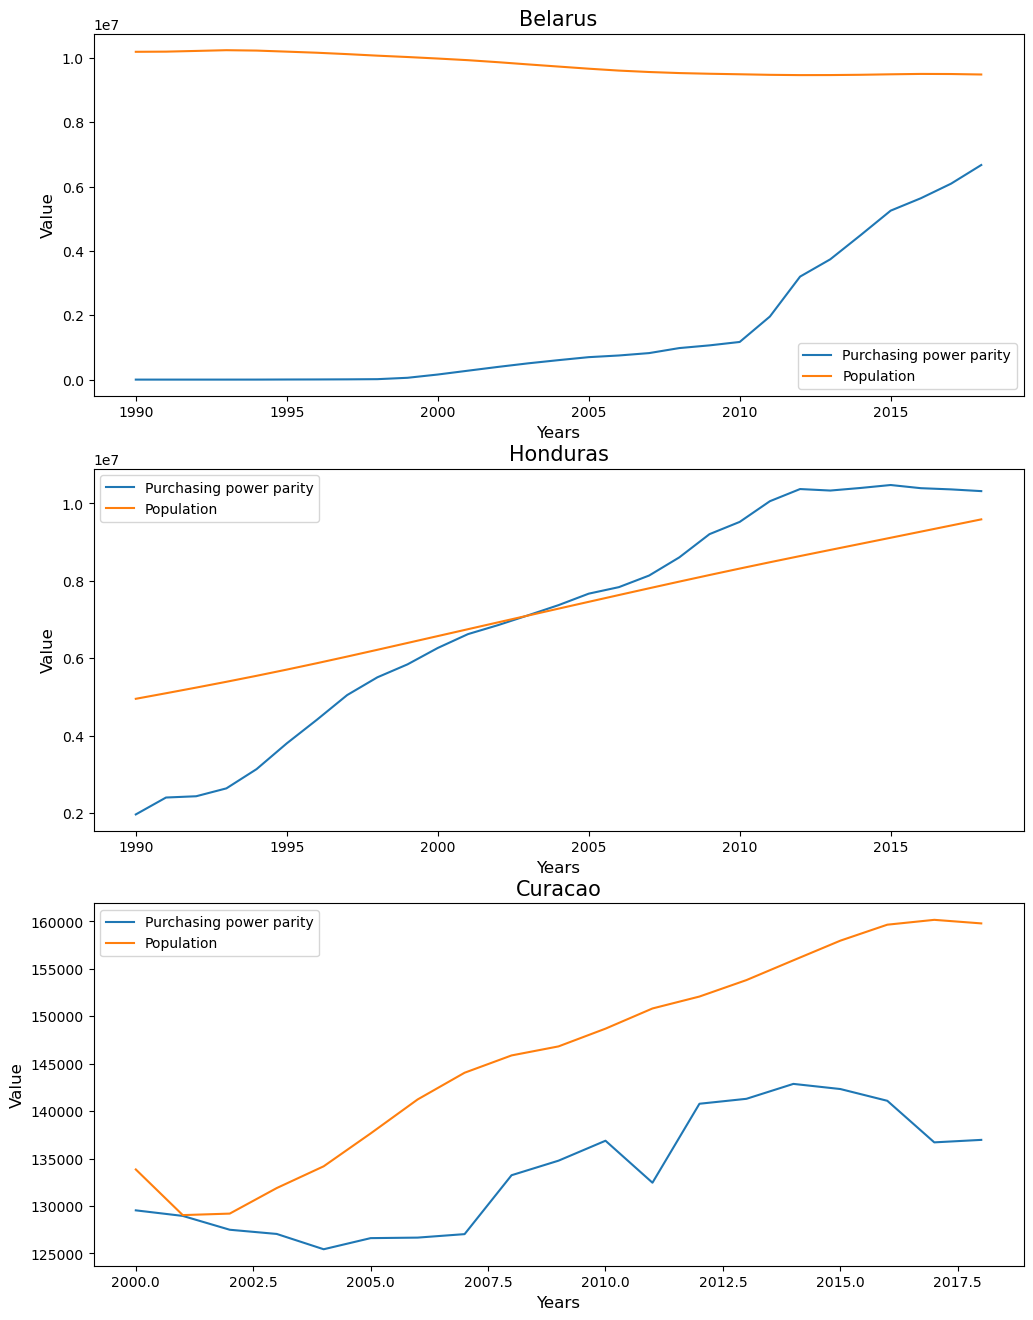

In [24]:
fig12, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,16))

ax1.plot(population_and_ppp_of_belarus['Year'], population_and_ppp_of_belarus['PPP']*10000000, label='Purchasing power parity')
ax1.plot(population_and_ppp_of_belarus['Year'], population_and_ppp_of_belarus['Value'], label='Population')
ax1.set_title('Belarus', fontsize = 15)
ax1.set_xlabel('Years', fontsize = 12)
ax1.set_ylabel('Value', fontsize = 12)
ax1.legend()

ax2.plot(population_and_ppp_of_honduras['Year'], population_and_ppp_of_honduras['PPP']*1000000, label='Purchasing power parity')
ax2.plot(population_and_ppp_of_honduras['Year'], population_and_ppp_of_honduras['Value'], label='Population')
ax2.set_title('Honduras', fontsize = 15)
ax2.set_xlabel('Years', fontsize = 12)
ax2.set_ylabel('Value', fontsize = 12)
ax2.legend()

ax3.plot(population_and_ppp_of_curacao['Year'], population_and_ppp_of_curacao['PPP']*100000, label='Purchasing power parity')
ax3.plot(population_and_ppp_of_curacao['Year'], population_and_ppp_of_curacao['Value'], label='Population')
ax3.set_title('Curacao', fontsize = 15)
ax3.set_xlabel('Years', fontsize = 12)
ax3.set_ylabel('Value', fontsize = 12)
ax3.legend()

plt.show()
fig12.savefig('../img/population_ppp.png')

# The relationship between population and the price of oil

In [25]:
population_and_oil_prices_of_belarus = population_of_belarus.merge(oil_prices_df, how='inner', on='Year')
population_and_oil_prices_of_honduras = population_of_honduras.merge(oil_prices_df, how='inner', on='Year')
population_and_oil_prices_of_curacao = population_of_curacao.merge(oil_prices_df, how='inner', on='Year')

### Belarus

In [26]:
population_and_oil_prices_of_belarus.corr()

,Year,Value,Price
Year,1.000000,-0.944341,0.773126
Value,-0.944341,1.000000,-0.866854
Price,0.773126,-0.866854,1.000000


Relationship between population and oil price of Belarus is high negative.

### Honduras

In [27]:
population_and_oil_prices_of_honduras.corr()

,Year,Value,Price
Year,1.000000,0.999651,0.773126
Value,0.999651,1.000000,0.782497
Price,0.773126,0.782497,1.000000


Relationship between population and oil price of Honduras is high.

### Curacao

In [28]:
population_and_oil_prices_of_curacao.corr()

,Year,Value,Price
Year,1.000000,0.419271,0.773126
Value,0.419271,1.000000,0.414988
Price,0.773126,0.414988,1.000000


Relationship between population and oil price of Curacao is weak.

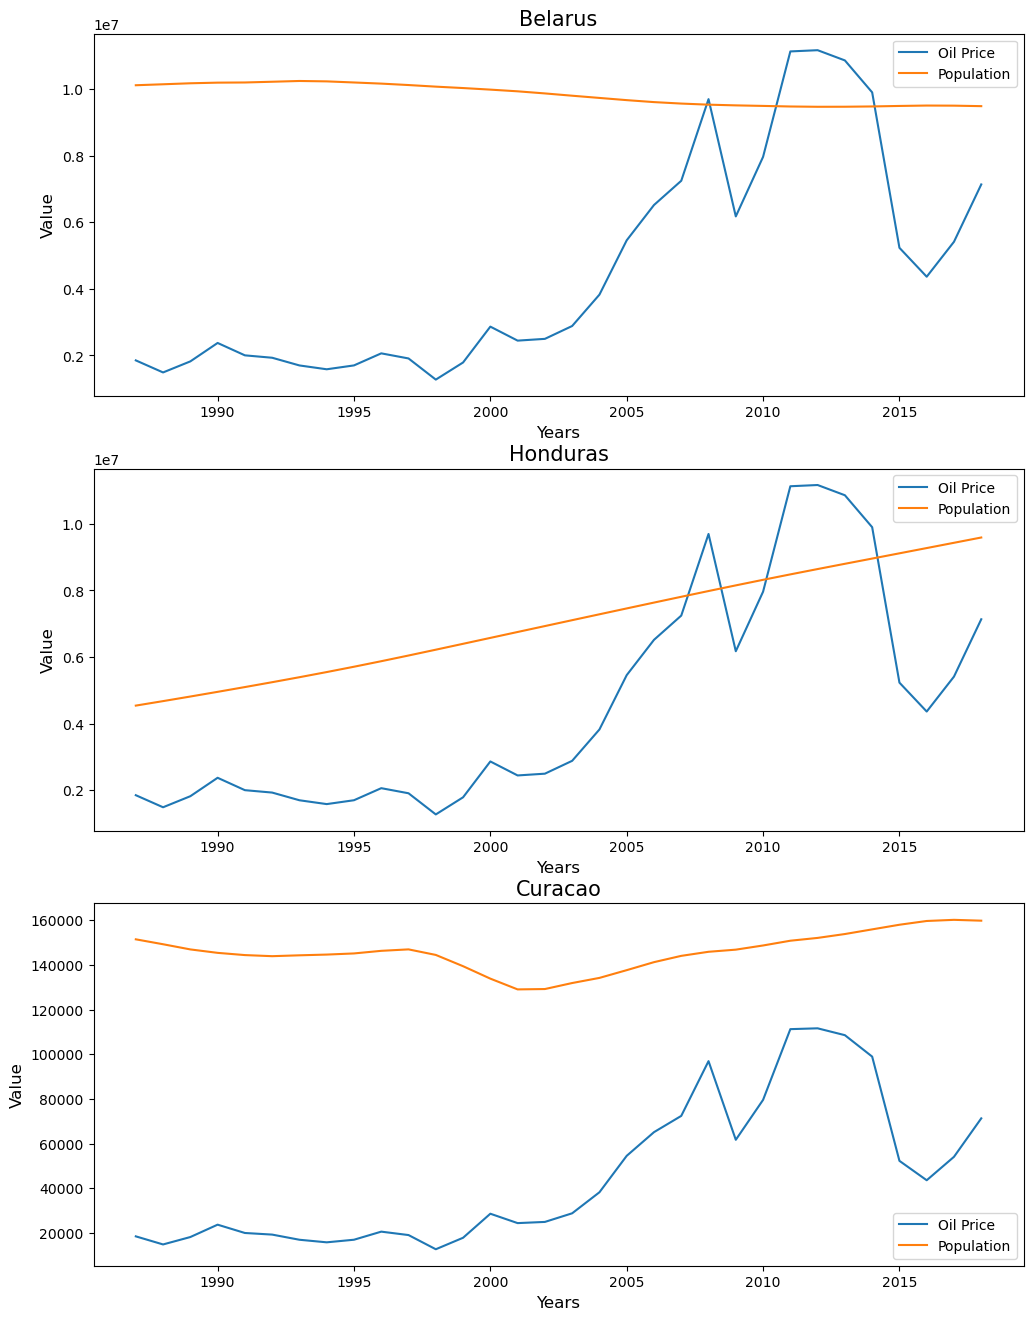

In [29]:
fig13, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,16))

ax1.plot(population_and_oil_prices_of_belarus['Year'], population_and_oil_prices_of_belarus['Price']*100000, label='Oil Price')
ax1.plot(population_and_oil_prices_of_belarus['Year'], population_and_oil_prices_of_belarus['Value'], label='Population')
ax1.set_title('Belarus', fontsize = 15)
ax1.set_xlabel('Years', fontsize = 12)
ax1.set_ylabel('Value', fontsize = 12)
ax1.legend()

ax2.plot(population_and_oil_prices_of_honduras['Year'], population_and_oil_prices_of_honduras['Price']*100000, label='Oil Price')
ax2.plot(population_and_oil_prices_of_honduras['Year'], population_and_oil_prices_of_honduras['Value'], label='Population')
ax2.set_title('Honduras', fontsize = 15)
ax2.set_xlabel('Years', fontsize = 12)
ax2.set_ylabel('Value', fontsize = 12)
ax2.legend()

ax3.plot(population_and_oil_prices_of_curacao['Year'], population_and_oil_prices_of_curacao['Price']*1000, label='Oil Price')
ax3.plot(population_and_oil_prices_of_curacao['Year'], population_and_oil_prices_of_curacao['Value'], label='Population')
ax3.set_title('Curacao', fontsize = 15)
ax3.set_xlabel('Years', fontsize = 12)
ax3.set_ylabel('Value', fontsize = 12)
ax3.legend()

plt.show()
fig13.savefig('../img/population_oil_price.png')

# The percentage of purchasing power parity of an individual country to the average purchasing power parity of all countries

In [30]:
ppp_of_all = pd.read_csv(ppp_path + 'ppp-gdp.csv')
all_ppp = ppp_of_all.groupby("Year", group_keys=False).mean('PPP')

In [31]:
def calc(ppp_value, ppp = all_ppp):
    mean_plot = ppp_value
    mean_plot = mean_plot.sort_values(by=['Year'])
    mean_plot = mean_plot.groupby('Year').mean()
    return mean_plot['PPP'] * 100 / ppp['PPP']

In [32]:
belarus_plot = pd.DataFrame([])
honduras_plot = pd.DataFrame([])
curacao_plot = pd.DataFrame([])

In [33]:
belarus_plot['Mean value'] = calc(ppp_of_belarus)
honduras_plot['Mean value'] = calc(ppp_of_honduras)
curacao_plot['Mean value'] = calc(ppp_of_curacao)

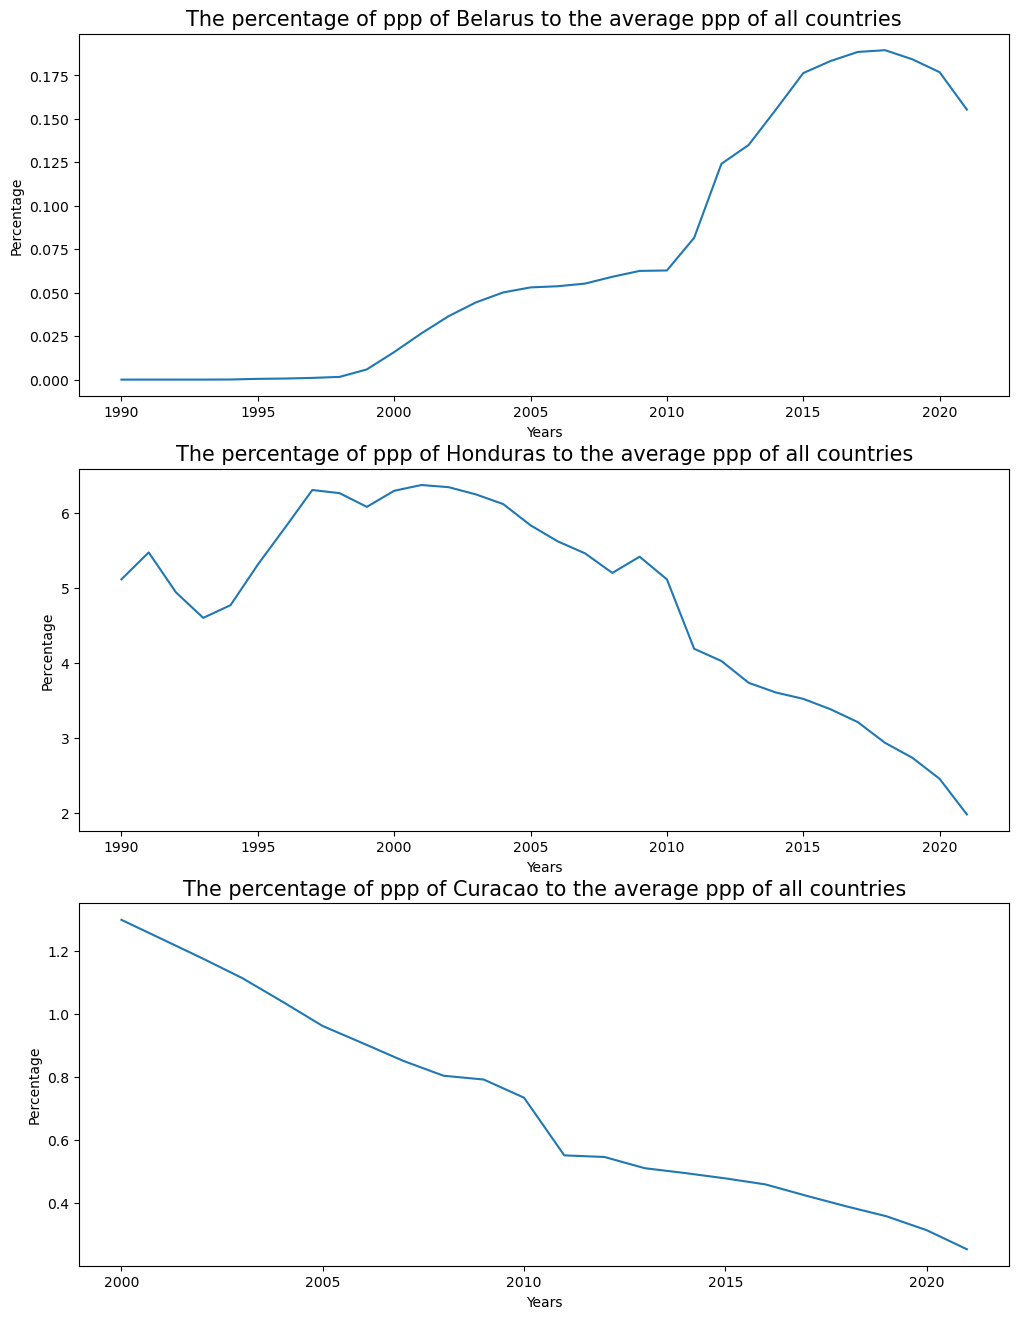

In [34]:
fig21, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,16))

ax1.plot(belarus_plot.index.values, belarus_plot['Mean value'])
ax1.set_title('The percentage of ppp of Belarus to the average ppp of all countries', fontsize = 15)
ax1.set_xlabel('Years', fontsize = 10)
ax1.set_ylabel('Percentage', fontsize = 10)

ax2.plot(honduras_plot.index.values, honduras_plot['Mean value'])
ax2.set_title('The percentage of ppp of Honduras to the average ppp of all countries', fontsize = 15)
ax2.set_xlabel('Years', fontsize = 10)
ax2.set_ylabel('Percentage', fontsize = 10)

ax3.plot(curacao_plot.index.values, curacao_plot['Mean value'])
ax3.set_title('The percentage of ppp of Curacao to the average ppp of all countries', fontsize = 15)
ax3.set_xlabel('Years', fontsize = 10)
ax3.set_ylabel('Percentage', fontsize = 10)

plt.show()
fig21.savefig('../img/percentage_of_ppp.png')